# QUESTION:
    
    SALES PREDICTION USING PYTHON
    
Sales prediction means predicting how much of a product people will buy based on factorssuch as the amount you spend to advertise your product, the segment of people youadvertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.


# STEPS:-
    
Data collection:

    Gather historical sales data along with information on advertising spending for TV, radio, and newspaper.

Data preprocessing: 

    Clean the data by handling missing values, outliers, and inconsistencies. Perform any necessary data transformations, such as encoding categorical variables.

Feature engineering:

    Create new features if needed, such as total advertising spend by combining the TV, radio, and newspaper variables.

Splitting the dataset:

    Divide the dataset into training and testing sets. Typically, 70-80% of the data is used for training, and the remaining 20-30% is used for testing.

Model selection: 

    Choose a suitable regression algorithm for sales prediction. Linear regression is a good starting point, but you can also consider other algorithms like decision trees, random forests, or gradient boosting algorithms.

Model training:

    Train the selected machine learning model on the training dataset. The model will learn the relationship between the advertising features (TV, radio, newspaper) and the target variable (sales).

Model evaluation:

    Evaluate the trained model's performance on the testing dataset using evaluation metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), or R-squared score. These metrics will help you assess how well the model predicts sales.

Model deployment: 

    Once you are satisfied with the model's performance, deploy it to predict sales on new, unseen data. You can incorporate the trained model into your business processes, such as using it to make sales forecasts for different advertising scenarios.  

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
#DATA COLLECTION

In [3]:
data = pd.read_csv('Advertising.csv')

In [4]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data.shape

(200, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
data=data.drop(columns=["Unnamed: 0"])

In [10]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
x=data.iloc[:,0:-1]

In [12]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
y=data.iloc[:,-1]

In [14]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [15]:
#SPLITING THE DATASET FOR TRAINING AND TESTING.

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [17]:
x_train=x_train.astype(int)
x_test=x_test.astype(int)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [18]:
x_train

,TV,Radio,Newspaper
152,197,23,14
67,139,14,10
133,219,33,45
59,210,29,9
63,102,29,8
...,...,...,...
148,38,40,11
137,273,28,59
156,93,43,50
15,195,47,52


In [19]:
x_test

,TV,Radio,Newspaper
150,280,13,37
28,248,27,22
13,97,7,7
178,276,2,23
109,255,26,5
168,215,23,57
177,170,7,35
196,94,4,8
47,239,41,18
195,38,3,13


In [20]:
y_train

152    16
67     13
133    19
59     18
63     14
       ..
148    10
137    20
156    15
15     22
99     17
Name: Sales, Length: 160, dtype: int32

In [21]:
y_test

150    16
28     18
13      9
178    11
109    19
168    17
177    11
196     9
47     23
195     7
136     9
77     14
187    17
166     8
84     21
175    27
155     3
167    12
121     7
192     5
176    20
113    15
89     16
147    25
185    22
143    10
199    13
126     6
5       7
97     15
34      9
139    20
44      8
72      8
183    26
85     15
149    10
46     10
86     12
112    14
Name: Sales, dtype: int32

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.fit_transform(x_test)

 *x_train_scaled = sc.fit_transform(x_train): The fit_transform() method of the StandardScaler object is used to perform 
    feature scaling on the training data, x_train. It computes the mean and standard deviation of the training data and
    then applies the scaling transformation to the data.

*x_test_scaled = sc.fit_transform(x_test): The fit_transform() method is again used to scale the test data, x_test.
    However, it's worth noting that the test data should be scaled using the parameters obtained from the training data,
    so it should be transformed using the transform() method instead of fit_transform().
    This ensures consistency in the scaling between the training and test sets

In [23]:
# APPLYING LINEAR REGRESSION

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
l=LinearRegression()

In [26]:
l.fit(x_train_scaled,y_train)

LinearRegression()

In [27]:
y_pred=l.predict(x_test_scaled)

In [28]:
from sklearn.metrics import r2_score

In [29]:
r2_score(y_test,y_pred)

0.8851131297860816

In [30]:
import matplotlib.pyplot as plt


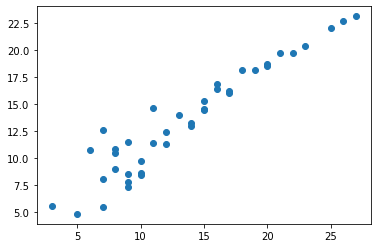

In [31]:
plt.scatter(y_test,y_pred)

In [32]:
#APPLYING KNN

In [33]:
k=10

In [34]:
knn=KNeighborsClassifier(k)

In [35]:
knn.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
yy_pred=knn.predict(x_test_scaled)

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
print(accuracy_score(y_test,yy_pred))

0.125


In [39]:
# USING KNN WE CAN'T PREDICT SALES PREDICTION MORE ACCURATLY.

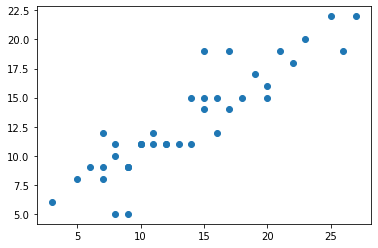

In [40]:
plt.scatter(y_test,yy_pred)